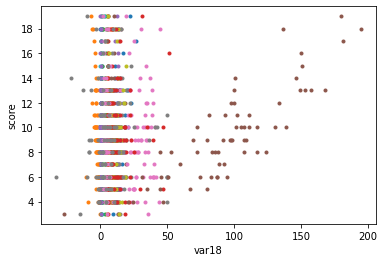

In [2]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Exercice 1 : Un medecin souhaite mettre en lien l'impact de differentes variables mesurees sur
#un 'score' qu'il estime pour quantifier le niveau d'une maladie. Les donnees sont
#sauvegardees dans le fichier 'obs2021_1.csv'. Idealement, il souhaiterait que seul un
#sous ensemble de ces variables permette d'expliquer le score.
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



import pandas
import numpy as np
import matplotlib.pyplot as plt

dataframe=pandas.read_csv("./obs2021_1.csv",sep=';')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('score')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only

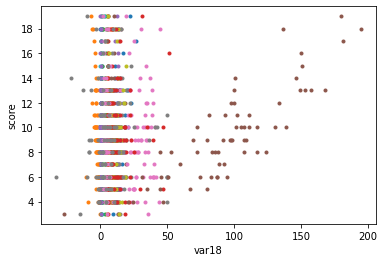

In [4]:
#QUESTION 1.1 : Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre
#certaines variables et la variable 'score'. Si oui, lesquels ?

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('score')
  #plt.show()


#### Les variables 1, 12, 16,

In [ ]:
#QUESTION 1.2 :   On se demande si il est possible de predire le niveau de 'score' à partir d'une
#               seule des variables 'var02', 'var09' ou 'var16'.

#QUESTION 1.2.1 : Effectuez une regression lineaire simple entre 'score' et chacune de ces
#               variables.  Toutes les donnees seront utilisees pour l'apprentissage. Evaluez alors la
#               qualité des predictions, sur toutes les donnees, l'aide de la moyenne de l'erreur de
#               prediction sur toutes les donnees, l'aide de la moyenne de l'erreur de prediction au
#               carre (MSE). Quel est le risque potentiel en utilisant cette stratégie de validation
#               de l'apprentissage ?

from sklearn import 